<a href="https://colab.research.google.com/github/Nonna-nna/Nonna-nna/blob/Image-processing/%E5%A4%9A%E5%AD%94%E8%B3%AA%E6%9D%90%E8%A7%A3%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.color-site.com/converts

HSV確認便利ツール

https://water2litter.net/rum/post/python_image_mask/#my_mokuji2

pythonとpillowを原理的にわかっていそうな方のサイト

https://ironodata.info/extraction/irotoridori.php

色見本

前画像の表示


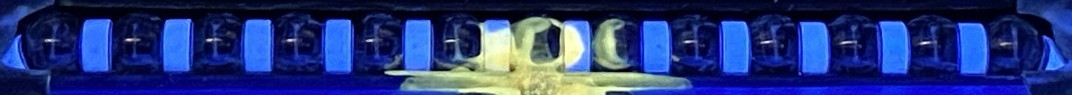

マスク後の画像を表示


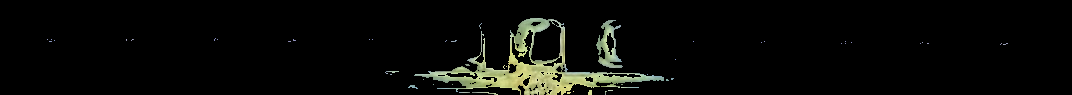

モノクログレースケール画像を表示


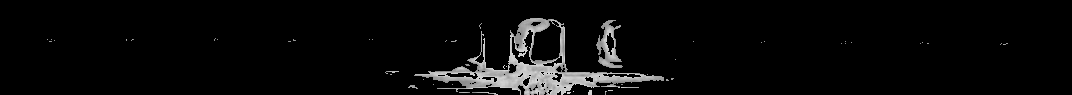

結果を表示


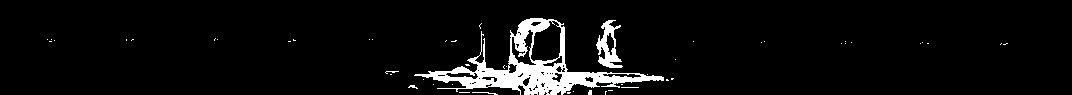

白のピクセル数は 5497
全ピクセル数は 101840
白のピクセルの割合は 5.397682639434407 %


In [ ]:
# チューリップのマスク
# https://kitakantech.com/opencv-select-redarea/

import cv2
import numpy as np
from google.colab.patches import cv2_imshow


infile='/content/drive/Shareddrives/多孔質材班/リテーナあり/多孔質材１個/120°/100%/1/resize/1.jpg'
img = cv2.imread(infile)
#前画像の表示
print("前画像の表示")
cv2_imshow(img)

#hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#GBR範囲指定
lower = np.array([96,128,128], dtype=np.uint8)
upper = np.array([192,224,224], dtype=np.uint8)

#maskとbitwise_andで赤い部分を抜いてその他を黒に。
maskRed = cv2.inRange(img, lower, upper)     
img_red = cv2.bitwise_and(img,img,  mask= maskRed)

#マスク後の画像を表示
print("マスク後の画像を表示")
cv2_imshow(img_red)

#グレースケールに変更
img_gray = cv2.cvtColor(img_red, cv2.COLOR_BGR2GRAY)
#モノクログレースケール画像を表示
print("モノクログレースケール画像を表示")
cv2_imshow(img_gray)

#二値化
threshold=83
ret, image_binary= cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)
#結果を表示
print("結果を表示")
cv2_imshow(image_binary)

#白ピクセルのカウント
white = cv2.countNonZero(image_binary)
print('白のピクセル数は', white)

all_pixel = np.size(image_binary)
#all_pixel = np.size(rbg_image)
print('全ピクセル数は', all_pixel)
white_ratio = (white / all_pixel) * 100
print('白のピクセルの割合は', white_ratio, '%')
